![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_IMDB.ipynb)


# Training a Sentiment Analysis Classifier with NLU 
## 2 class IMDB Movie sentiment classifier training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data:


<br>


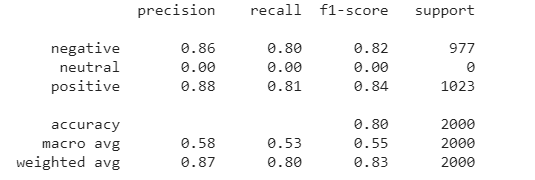



You  can achieve these results or even better on this dataset with test  data:


<br>


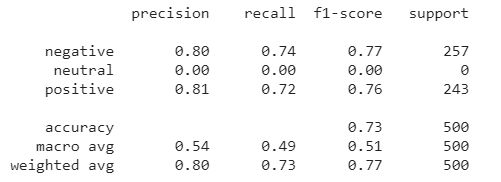


# 1. Install Java 8 and NLU

In [ ]:
import os
from sklearn.metrics import classification_report
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu pyspark==2.4.7 > /dev/null  


import nlu

# 2. Download IMDB dataset
https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/01/IMDB-Dataset.csv


--2021-03-01 01:39:07--  http://ckl-it.de/wp-content/uploads/2021/01/IMDB-Dataset.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3288450 (3.1M) [text/csv]
Saving to: ‘IMDB-Dataset.csv’

IMDB-Dataset.csv    100%[===================>]   3.14M  2.26MB/s    in 1.4s    

2021-03-01 01:39:09 (2.26 MB/s) - ‘IMDB-Dataset.csv’ saved [3288450/3288450]



In [ ]:
import pandas as pd
train_path = '/content/IMDB-Dataset.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
# the label column must have name 'y' name be of type str
columns=['text','y']
train_df = train_df[columns]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
538,Sixth escapade for Freddy Krueger in which he ...,negative
725,As a long-time fan of all the Star Trek series...,negative
219,Ed Wood rides again. The fact that this movie ...,negative
2302,There aren't many good things to say at all ab...,negative
2156,A humorous voyage into the normally somber fun...,positive
...,...,...
339,I find the critique of many IMDb users a littl...,negative
1838,All the kids aged from 14-16 want to see this ...,negative
2113,"Once a wise man from India once said, ""First t...",positive
676,I have to say this is my favorite movie of all...,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
import nlu 
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlu.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
              precision    recall  f1-score   support

    negative       1.00      0.75      0.86        24
    positive       0.81      1.00      0.90        26

    accuracy                           0.88        50
   macro avg       0.91      0.88      0.88        50
weighted avg       0.90      0.88      0.88        50



,sentiment,default_name_embeddings,text,document,y,sentiment_confidence
origin_index,,,,,,
538,positive,"[0.061155349016189575, -0.04764186963438988, -...",Sixth escapade for Freddy Krueger in which he ...,Sixth escapade for Freddy Krueger in which he ...,negative,0.661084
725,positive,"[-0.04899926111102104, 0.04536202922463417, -0...",As a long-time fan of all the Star Trek series...,As a long-time fan of all the Star Trek series...,negative,0.819501
219,negative,"[0.06203395500779152, -0.015943678095936775, -...",Ed Wood rides again. The fact that this movie ...,Ed Wood rides again. The fact that this movie ...,negative,0.990434
2302,negative,"[0.05896253511309624, 0.012287295423448086, -0...",There aren't many good things to say at all ab...,There aren't many good things to say at all ab...,negative,0.834288
2156,positive,"[-0.05029047280550003, -0.002712259767577052, ...",A humorous voyage into the normally somber fun...,A humorous voyage into the normally somber fun...,positive,0.995070
950,positive,"[0.04065236821770668, 0.006623167544603348, 0....",What a good movie! At last a picture revealing...,What a good movie! At last a picture revealing...,positive,0.992898
2454,negative,"[0.053874578326940536, -0.050784021615982056, ...",Deep Shock plays out like a TV movie: a whole ...,Deep Shock plays out like a TV movie: a whole ...,negative,0.994428
585,positive,"[0.005484528839588165, -0.003261507721617818, ...",A drifter looking for a job is mistaken for a ...,A drifter looking for a job is mistaken for a ...,positive,0.933213
1658,positive,"[0.0026102750562131405, -0.028329210355877876,...","Yes, I know that this movie is meant as a come...","Yes, I know that this movie is meant as a come...",positive,0.862425


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict('It was one of the best films i have ever watched in my entire life !!')

,sentiment,default_name_embeddings,document,sentiment_confidence
origin_index,,,,
0,negative,"[-0.022810865193605423, 0.015739120543003082, ...",It was one of the best films i have ever watch...,0.629151


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['sentiment_dl'] has settable params:
pipe['sentiment_dl'].setMaxEpochs(2)                 | Info: Maximum number of epochs to train | Currently set to : 2
pipe['sentiment_dl'].setLr(0.005)                    | Info: Learning Rate | Currently set to : 0.005
pipe['sentiment_dl'].setBatchSize(64)                | Info: Batch size | Currently set to : 64
pipe['sentiment_dl'].setDropout(0.5)                 | Info: Dropout coefficient | Currently set to : 0.5
pipe['sentiment_dl'].setEnableOutputLogs(True)       | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
pipe['sentiment_dl'].setThreshold(0.6)               | Info: The minimum threshold for the final result otheriwse it will be neutral | Currently set to : 0.6
pipe['sentiment_dl'].setThresholdLabel('neutral')    | Info: In case the score is less than threshold, what should be the label. Default i

## 6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe['sentiment_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.96      0.96      0.96        24
     neutral       0.00      0.00      0.00         0
    positive       0.96      0.88      0.92        26

    accuracy                           0.92        50
   macro avg       0.64      0.61      0.63        50
weighted avg       0.96      0.92      0.94        50



,sentiment,default_name_embeddings,text,document,y,sentiment_confidence
origin_index,,,,,,
538,negative,"[0.061155349016189575, -0.04764186963438988, -...",Sixth escapade for Freddy Krueger in which he ...,Sixth escapade for Freddy Krueger in which he ...,negative,0.736202
725,negative,"[-0.04899926111102104, 0.04536202922463417, -0...",As a long-time fan of all the Star Trek series...,As a long-time fan of all the Star Trek series...,negative,0.829032
219,negative,"[0.06203395500779152, -0.015943678095936775, -...",Ed Wood rides again. The fact that this movie ...,Ed Wood rides again. The fact that this movie ...,negative,0.937502
2302,negative,"[0.05896253511309624, 0.012287295423448086, -0...",There aren't many good things to say at all ab...,There aren't many good things to say at all ab...,negative,0.897272
2156,positive,"[-0.05029047280550003, -0.002712259767577052, ...",A humorous voyage into the normally somber fun...,A humorous voyage into the normally somber fun...,positive,0.948001
950,positive,"[0.04065236821770668, 0.006623167544603348, 0....",What a good movie! At last a picture revealing...,What a good movie! At last a picture revealing...,positive,0.874555
2454,negative,"[0.053874578326940536, -0.050784021615982056, ...",Deep Shock plays out like a TV movie: a whole ...,Deep Shock plays out like a TV movie: a whole ...,negative,0.971650
585,positive,"[0.005484528839588165, -0.003261507721617818, ...",A drifter looking for a job is mistaken for a ...,A drifter looking for a job is mistaken for a ...,positive,0.753176
1658,negative,"[0.0026102750562131405, -0.028329210355877876,...","Yes, I know that this movie is meant as a come...","Yes, I know that this movie is meant as a come...",positive,0.767478


# 7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(120)  
trainable_pipe['sentiment_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.86      0.80      0.82       977
     neutral       0.00      0.00      0.00         0
    positive       0.88      0.81      0.84      1023

    accuracy                           0.80      2000
   macro avg       0.58      0.53      0.55      2000
weighted avg       0.87      0.80      0.83      2000



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.80      0.74      0.77       257
     neutral       0.00      0.00      0.00         0
    positive       0.81      0.72      0.76       243

    accuracy                           0.73       500
   macro avg       0.54      0.49      0.51       500
weighted avg       0.80      0.73      0.77       500



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('It was one of the best films i have ever watched in my entire life !!')
preds

Fitting on empty Dataframe, could not infer correct training method!


,sentiment,en_embed_sentence_small_bert_L12_768_embeddings,sentiment_confidence,document
origin_index,,,,
0,positive,"[0.09222018718719482, 0.11720675230026245, 0.1...",0.999543,It was one of the best films i have ever watch...


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')            | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector'] has settable params:
pipe['sentence_detector'].setCustomBounds([])                  | Info: characters used to explicitly mark sentence bounds | Currently set to : []
pipe['sentence_detector'].setDetectLists(True)                 | Info: whether detect lists during sentence detection | Currently set to : True
pipe['sentence_detector'].setExplodeSentences(False)           | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector'].setMaxLength(99999)                  | Info: Set the maximum allowed length for ea